* Preprocessing dataset (String to List)

In [ ]:
import pandas as pd
import ast
import networkx as nx

# Load your dataset
df = pd.read_csv("drive/MyDrive/DSA2.csv")

# Convert stringified lists to Python lists for columns with lists
def str_to_list(cell):
    if pd.isna(cell) or cell == "":
        return []
    try:
        return ast.literal_eval(cell)
    except (ValueError, SyntaxError):
        # If not a list, return as a single-item list or empty
        return []

df["Prerequisites"] = df["Prerequisites"].apply(str_to_list)
df["Related_Concepts"] = df["Related_Concepts"].apply(str_to_list)
df["Learning_Resources"] = df["Learning_Resources"].apply(str_to_list)

# Create directed graph
G = nx.DiGraph()

for _, row in df.iterrows():
    concept = row["Concept"]

    # Add node with metadata
    G.add_node(
        concept,
        level=row["Level"],
        category=row["Category"],
        concept_type=row["Concept_Type"],
        est_learning_time_hours=row["Est_Learning_Time_Hours"],
        is_fundamental=row["Is_Fundamental"],
        learning_resources=row["Learning_Resources"]
    )

    # Add prerequisite edges (directed: prereq -> concept)
    for prereq in row["Prerequisites"]:
        if prereq:  # skip empty
            G.add_edge(prereq, concept, relation="prerequisite")

    # Add related concept edges (can be undirected or directed with label)
    for related in row["Related_Concepts"]:
        if related:
            # If you want these edges undirected, add in both directions
            G.add_edge(concept, related, relation="related")
            # Optionally also G.add_edge(related, concept, relation="related")

# Now G contains the graph with your concepts and their relations


* Extracting KG as JSON

In [ ]:
# Save as JSON for easy API or DB integration
import json
import networkx as nx
from networkx.readwrite import json_graph

# graph `G` is already built at this point

# Write to JSON
graph_data = json_graph.node_link_data(G)
with open("dsa_kg.json", "w") as f:
    json.dump(graph_data, f, indent=4)

with open("dsa_kg.json", "r") as f:
    loaded_data = json.load(f)

G_loaded = json_graph.node_link_graph(loaded_data)
print("Graph loaded from JSON successfully:", G_loaded.number_of_nodes(), "nodes")


Graph loaded from JSON successfully: 179 nodes


/usr/local/lib/python3.11/dist-packages/networkx/readwrite/json_graph/node_link.py:145: FutureWarning: 
The default value will be `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_data(G, edges="links") to preserve current behavior, or
  nx.node_link_data(G, edges="edges") for forward compatibility.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/networkx/readwrite/json_graph/node_link.py:290: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


* KG Visualization

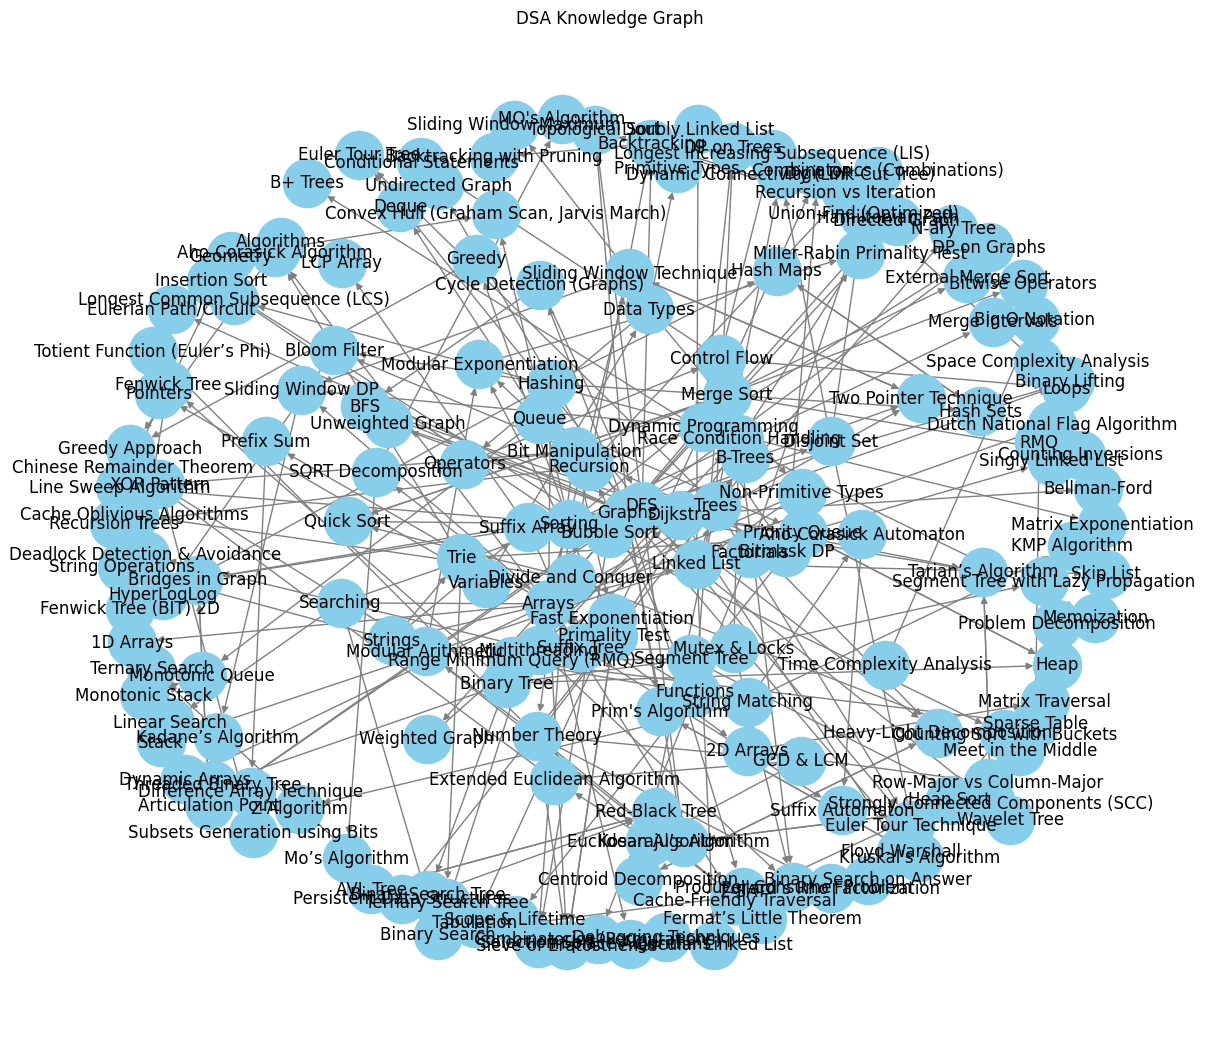

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5, iterations=50)  # Layout
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1200, edge_color='gray')
plt.title("DSA Knowledge Graph")
plt.show()
